In [604]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of 
          samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [605]:
>>> import pandas as pd
>>> df = pd.read_csv('iris(2).data',
...                  header=None)
>>> df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


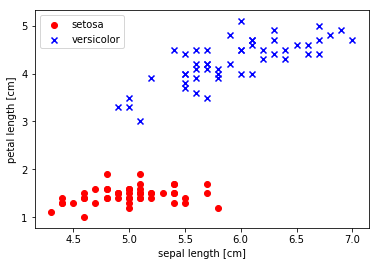

In [606]:
>>> import matplotlib.pyplot as plt
>>> import numpy as np

>>> # select setosa and versicolor
>>> y = df.iloc[0:100, 4].values
>>> y = np.where(y == 'Iris-setosa', -1, 1)
>>> # extract sepal length and petal length
>>> X = df.iloc[0:100, [0, 2]].values
>>> # plot data
>>> plt.scatter(X[:50, 0], X[:50, 1],
...             color='red', marker='o', label='setosa')
>>> plt.scatter(X[50:100, 0], X[50:100, 1],
...             color='blue', marker='x', label='versicolor')
>>> plt.xlabel('sepal length [cm]')
>>> plt.ylabel('petal length [cm]')
>>> plt.legend(loc='upper left')
>>> plt.show()

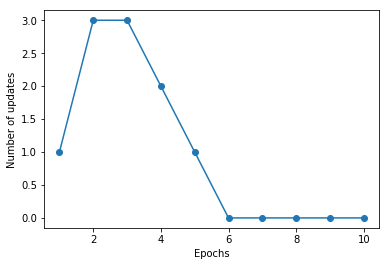

In [607]:
>>> ppn = Perceptron(eta=0.1, n_iter=10)
>>> ppn.fit(X, y)
>>> plt.plot(range(1, len(ppn.errors_) + 1), 
...          ppn.errors_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Number of updates')
>>> plt.show()

In [608]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

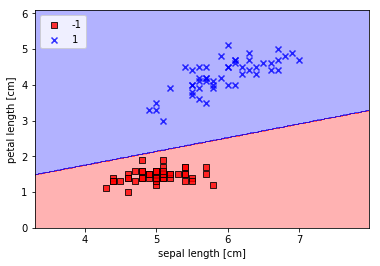

In [609]:
>>> plot_decision_regions(X, y, classifier=ppn)
>>> plt.xlabel('sepal length [cm]')
>>> plt.ylabel('petal length [cm]')
>>> plt.legend(loc='upper left')
>>> plt.show()

In [610]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of
          samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, 
                              size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) 
                        >= 0.0, 1, -1)



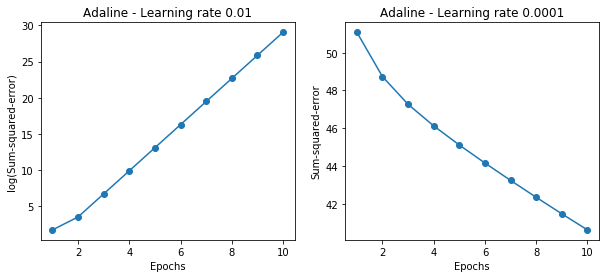

In [611]:
>>> fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

>>> ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
>>> ax[0].plot(range(1, len(ada1.cost_) + 1), 
...            np.log10(ada1.cost_), marker='o')
>>> ax[0].set_xlabel('Epochs')
>>> ax[0].set_ylabel('log(Sum-squared-error)')
>>> ax[0].set_title('Adaline - Learning rate 0.01')

>>> ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
>>> ax[1].plot(range(1, len(ada2.cost_) + 1), 
...            ada2.cost_, marker='o')
>>> ax[1].set_xlabel('Epochs')
>>> ax[1].set_ylabel('Sum-squared-error')
>>> ax[1].set_title('Adaline - Learning rate 0.0001')
>>> plt.show()

In [612]:
>>> X_std = np.copy(X)
>>> X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
>>> X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

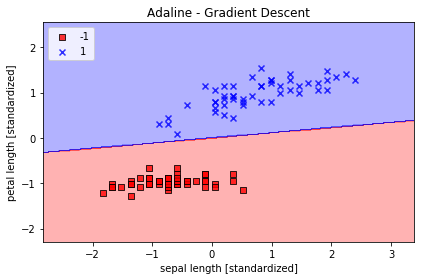

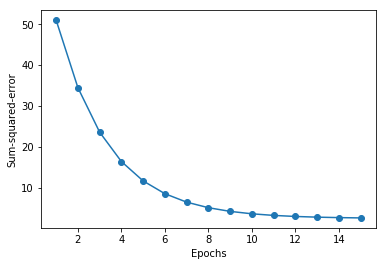

In [613]:
>>> ada = AdalineGD(n_iter=15, eta=0.01)
>>> ada.fit(X_std, y)

>>> plot_decision_regions(X_std, y, classifier=ada)
>>> plt.title('Adaline - Gradient Descent')
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.tight_layout()
>>> plt.show()

>>> plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Sum-squared-error')
>>> plt.show()

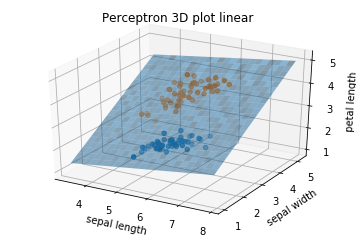

In [614]:
# Perceptron for 3 features (linear case)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# extract sepal length, sepal width, petal length and petal width. 
X = df.iloc[0:100,[0,1,2]].values

# select setosa and versicolor 
y = df.iloc[0:100,4].values
y = np.where(y == 'iris-setosa',-1,1)
y[0:50] =-1

# plot data
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X[:50,0],X[:50,1],X[:50,2])
ax.scatter(X[50:100,0],X[50:100,1],X[50:100,2])

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)


#consider a,b,c,d to be the acquired weights after training 
a,b,c,d = ppn.w_[1],ppn.w_[2],ppn.w_[3],ppn.w_[0]

# Range of values of variables, say x and y
x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1

x = np.arange(x_min,x_max,0.2)
y = np.arange(y_min,y_max,0.2)

# generate a mesh grid
X, Y = np.meshgrid(x,y)

# Z axis is given by equation of plane
# iX+jY+kZ = l
Z = (-d - a*X - b*Y) /c

# ploting the surface
ax.plot_surface(X,Y,Z, alpha = 0.5)

ax.set_xlabel('sepal length ')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.set_title('Perceptron 3D plot linear')

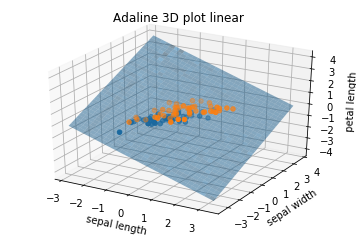

In [615]:
# Adaline for 3 features (linear case)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# extract sepal length, sepal width, petal length and petal width. 
X = df.iloc[0:100,[0,1,2]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

# select setosa and versicolor 
y = df.iloc[0:100,4].values
y = np.where(y == 'iris-setosa', -1,1)
y[0:50] = -1

# plot data
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_std[:50,0],X_std[:50,1],X_std[:50,2])
ax.scatter(X_std[50:100,0],X_std[50:100,1],X_std[50:100,2])

ada = AdalineGD(n_iter =15, eta = 0.01)
ada.fit(X_std,y)


#consider a,b,c,d to be the acquired weights after training 
a,b,c,d = ada.w_[1],ada.w_[2],ada.w_[3],ada.w_[0]

# Range of values of variables, say x and y
x_min,x_max = X_std[:,0].min() - 1, X_std[:,0].max() + 1
y_min,y_max = X_std[:,1].min() - 1, X_std[:,1].max() + 1

x = np.arange(x_min,x_max,0.2)
y = np.arange(y_min,y_max,0.2)

# generate a mesh grid
X, Y = np.meshgrid(x,y)

# Z axis is given by equation of plane
# iX+jY+kZ = l
Z = (-d - a*X - b*Y) /c

# ploting the surface
ax.plot_surface(X,Y,Z, alpha = 0.5)

ax.set_xlabel('sepal length ')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.set_title('Adaline 3D plot linear')

In [616]:
# Perceptron for 4 features (linear case)
# select setosa and versicolor 
y = df.iloc[0:100,4].values
y = np.where(y=='iris-setosa',-1,1)
y[0:50] = -1

# extract sepal length, sepal width, petal length and petal width 
X = df.iloc[0:100,[0,1,2,3]].values

ppn = Perceptron(eta=0.1, n_iter =10)
ppn.fit(X,y)

# confusion matrix 
y_prediction = ppn.predict(X)
CM = confusion_matrix(y_true=y,y_pred=y_prediction)
print(CM)

[[50  0]
 [ 0 50]]


In [617]:
# Adaline for 4 features (linear case)
# select setosa and versicolor 
y = df.iloc[0:100,4].values
y = np.where(y=='iris-setosa',-1,1)
y[0:50] = -1

# extract sepal length, sepal width, petal length and petal width 
X = df.iloc[0:100,[0,1,2,3]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

ada = AdalineGD(n_iter =15, eta =0.01)
ada.fit(X_std,y)

# confusion matrix 
y_prediction = ada.predict(X_std)
CM = confusion_matrix(y_true=y,y_pred=y_prediction)
print(CM)

[[50  0]
 [ 0 50]]


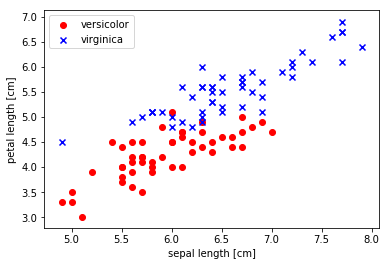

In [618]:
# Perceptron for 2 features (non-linear case)
>>> import matplotlib.pyplot as plt
>>> import numpy as np

>>> # select setosa and versicolor
>>> y = df.iloc[50:150, 4].values
>>> y = np.where(y == 'Iris-versicolor', -1, 1)
>>> # extract sepal length and petal length
>>> X = df.iloc[50:150, [0, 2]].values
>>> # plot data
>>> plt.scatter(X[:50, 0], X[:50, 1],
...             color='red', marker='o', label='versicolor')
>>> plt.scatter(X[50:100, 0], X[50:100, 1],
...             color='blue', marker='x', label='virginica')
>>> plt.xlabel('sepal length [cm]')
>>> plt.ylabel('petal length [cm]')
>>> plt.legend(loc='upper left')
>>> plt.show()

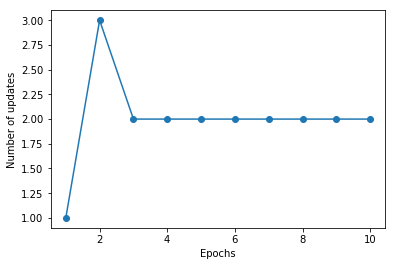

In [619]:
>>> ppn = Perceptron(eta=0.1, n_iter=10)
>>> ppn.fit(X, y)
>>> plt.plot(range(1, len(ppn.errors_) + 1), 
...          ppn.errors_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Number of updates')
>>> plt.show()

In [620]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

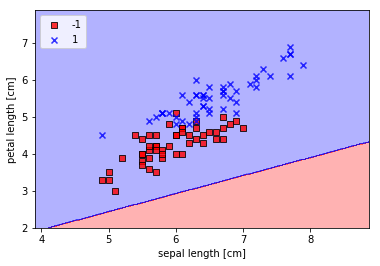

In [621]:
>>> plot_decision_regions(X, y, classifier=ppn)
>>> plt.xlabel('sepal length [cm]')
>>> plt.ylabel('petal length [cm]')
>>> plt.legend(loc='upper left')
>>> plt.show()

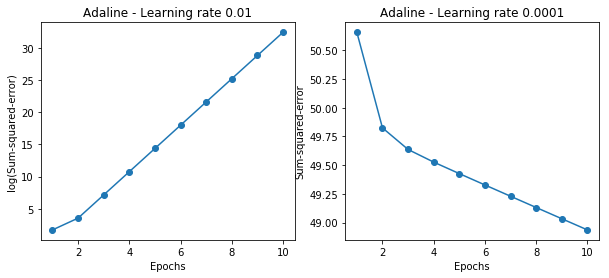

In [622]:
# Adaline for 2 features (non-linear case)
>>> fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

>>> ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
>>> ax[0].plot(range(1, len(ada1.cost_) + 1), 
...            np.log10(ada1.cost_), marker='o')
>>> ax[0].set_xlabel('Epochs')
>>> ax[0].set_ylabel('log(Sum-squared-error)')
>>> ax[0].set_title('Adaline - Learning rate 0.01')

>>> ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
>>> ax[1].plot(range(1, len(ada2.cost_) + 1), 
...            ada2.cost_, marker='o')
>>> ax[1].set_xlabel('Epochs')
>>> ax[1].set_ylabel('Sum-squared-error')
>>> ax[1].set_title('Adaline - Learning rate 0.0001')
>>> plt.show()

In [623]:
>>> X_std = np.copy(X)
>>> X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
>>> X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

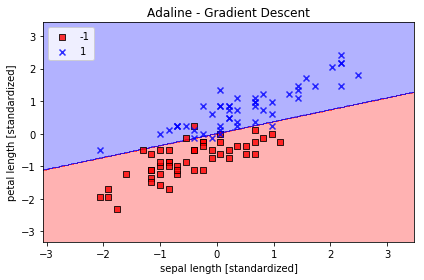

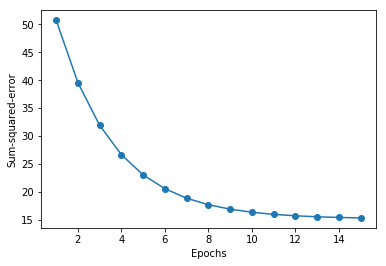

In [624]:
>>> ada = AdalineGD(n_iter=15, eta=0.01)
>>> ada.fit(X_std, y)

>>> plot_decision_regions(X_std, y, classifier=ada)
>>> plt.title('Adaline - Gradient Descent')
>>> plt.xlabel('sepal length [standardized]')
>>> plt.ylabel('petal length [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.tight_layout()
>>> plt.show()

>>> plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
>>> plt.xlabel('Epochs')
>>> plt.ylabel('Sum-squared-error')
>>> plt.show()

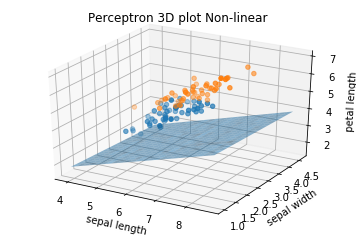

In [625]:
# Perceptron for 3 features (non-linear case)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# extract sepal length, sepal width, petal length and petal width. 
X = df.iloc[50:150,[0,1,2]].values

# select versicolor and virginica 
y = df.iloc[50:150,4].values
y = np.where(y == 'iris-versicolor',-1,1)
y[0:50] = -1

# plot data
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X[:50,0],X[:50,1],X[:50,2])
ax.scatter(X[50:100,0],X[50:100,1],X[50:100,2])

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)


#consider a,b,c,d to be the acquired weights after training 
a,b,c,d = ppn.w_[1],ppn.w_[2],ppn.w_[3],ppn.w_[0]

# Range of values of variables, say x and y
x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1

x = np.arange(x_min,x_max,0.2)
y = np.arange(y_min,y_max,0.2)

# generate a mesh grid
X, Y = np.meshgrid(x,y)

# Z axis is given by equation of plane
# iX+jY+kZ = l
Z = (-d - a*X - b*Y) /c

# ploting the surface
ax.plot_surface(X,Y,Z, alpha = 0.5)

ax.set_xlabel('sepal length ')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.set_title('Perceptron 3D plot Non-linear')

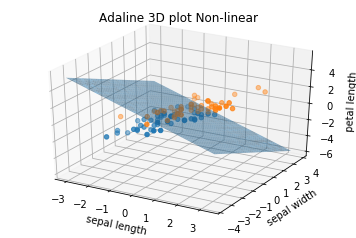

In [626]:
# perceptron for 3 features (non-linear case)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# extract sepal length, sepal width, petal length and petal width. 
X = df.iloc[50:150,[0,1,2]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

# select setosa and versicolor 
y = df.iloc[50:150,4].values
y = np.where(y == 'iris-versicolor', -1,1)
y[0:50] = -1


# plot data
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_std[:50,0],X_std[:50,1],X_std[:50,2])
ax.scatter(X_std[50:100,0],X_std[50:100,1],X_std[50:100,2])

ada = AdalineGD(n_iter =15, eta = 0.01)
ada.fit(X_std,y)


#consider a,b,c,d to be the acquired weights after training 
a,b,c,d = ada.w_[1],ada.w_[2],ada.w_[3],ada.w_[0]

# Range of values of variables, say x and y
x_min,x_max = X_std[:,0].min() - 1, X_std[:,0].max() + 1
y_min,y_max = X_std[:,1].min() - 1, X_std[:,1].max() + 1

x = np.arange(x_min,x_max,0.2)
y = np.arange(y_min,y_max,0.2)

# generate a mesh grid
X, Y = np.meshgrid(x,y)

# Z axis is given by equation of plane
# iX+jY+kZ = l
Z = (-d - a*X - b*Y) /c

# ploting the surface
ax.plot_surface(X,Y,Z, alpha = 0.5)

ax.set_xlabel('sepal length ')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.set_title('Adaline 3D plot Non-linear')

In [627]:
# Perceptron for 4 features (non-linear case)
# select setosa and versicolor 
y = df.iloc[50:150,4].values
y = np.where(y=='iris-setosa',-1,1)
y[0:50] = -1

# extract sepal length, sepal width, petal length and petal width 
X = df.iloc[50:150,[0,1,2,3]].values

ppn = Perceptron(eta=0.1, n_iter =10)
ppn.fit(X,y)

# confusion matrix 
y_prediction = ppn.predict(X)
CM = confusion_matrix(y_true=y,y_pred=y_prediction)
print(CM)

[[ 0 50]
 [ 0 50]]


In [628]:
# Adaline for 4 features (non-linear case)
# select setosa and versicolor 
y = df.iloc[50:150,4].values
y = np.where(y=='iris-setosa',-1,1)
y[0:50] = -1

# extract sepal length, sepal width, petal length and petal width 
X = df.iloc[50:150,[0,1,2,3]].values
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

ada = AdalineGD(n_iter =15, eta =0.01)
ada.fit(X_std,y)

# confusion matrix 
y_prediction = ada.predict(X_std)
CM = confusion_matrix(y_true=y,y_pred=y_prediction)
print(CM)

[[ 0 50]
 [ 0 50]]
